
Kristoffer Sandås <br>
b19krisa@student.his.se <br>
3/5/2022

This program contains a class called GeneAnalysis which perfoms analysis on gene expression data. It imports data from a file and contains various functions that can be used to produce information about the expression data. 

**The required input** is a csv file with a matrix of log-normalized gene expression values with the gene names on the first column, and a list defining which columns contain the control samples (group 0) and which contain the treated samples (group 1). For the function logFC the user can specify the log fold change threshold with which to filter the data, as well as specify if the output should be printed or not.

**The outputs of the functions in the program are:** <br>
*colsum* - a barplot of the summed values in each column <br>
*boxplot* - boxplots for both groups, displaying the values for each column <br>
*logFC* - a dataframe filtered by a log fold change threshold containing group mean values for each gene and    log fold changes  <br>
*logFCplot* - a scatter plot of the mean values for both groups


In [1]:
import pandas as pd

In [2]:
class GeneAnalysis:
    """
    Defines a class for gene analysis of data in a matrix imported from a file.
    """
    VERSION = "Version 1.0"
    
    def __init__ (self, file, groups):
        self.source_file = file
        self.groups = groups
        self.df = pd.read_csv(file, sep='\t', index_col=0)
        
    def colsum(self):
        """
        Sums the values of each column and displays a barplot of the results.
        """
        sumd_cols = self.df.sum(axis=0)
        ax = sumd_cols.plot.bar()
        ax.set_ylabel('Summed expression values')
        
    def boxplot(self):
        """
        Displays boxplots of the values in each column. Creates separate plots
        for group 0 and group 1.
        """
        index_0 = [index for(index,item) in enumerate(groups) if item ==0]
        index_1 = [index for(index,item) in enumerate(groups) if item ==1]
        control_df = self.df.iloc[:,index_0]
        treated_df = self.df.iloc[:,index_1]
        ax1 = control_df.plot.box(title="Group 0: controls")
        ax1.set_ylabel('Normalized expression level')
        ax2 = treated_df.plot.box(title="Group 1: treated",color='red')
        ax2.set_ylabel('Normalized expression level')
            
    def logFC(self, threshold = 0.5, output = 0):
        """
        Produces a dataframe with group mean values for each gene, and log
        fold changes. Filters the genes included by a fold change threshold 
        that can be set by the user. 
        Output=1 can be set to display the results in a table.
        """
        index_0 = [index for(index,item) in enumerate(groups) if item ==0]
        index_1 = [index for(index,item) in enumerate(groups) if item ==1]
        control_df = self.df.iloc[:,index_0]
        treated_df = self.df.iloc[:,index_1]
        mean_controls = control_df.mean(axis=1)
        mean_treated = treated_df.mean(axis=1)
        df_means_FC = pd.concat([mean_controls,mean_treated],axis=1)
        df_means_FC.columns = ['Group 0: controls', 'Group 1: treated']
        df_means_FC["Log Fold Change"] = (df_means_FC['Group 1: treated']-df_means_FC['Group 0: controls'])
        FC_fltr = (abs(df_means_FC["Log Fold Change"])>threshold)
        filt_df_means_FC = df_means_FC[FC_fltr]
        if output == 1:
            display(filt_df_means_FC)
        return filt_df_means_FC
    
    def logFCplot(self):
        """
        Prodcuces a scatter plot of the group means for genes, 
        using a log fold threshold of 0.5 to determine which genes are included
        """
        df_means = data.logFC()
        df_means.plot.scatter(title="Scatter plot of mean expression values", x='Group 1: treated',y='Group 0: controls')
        

### Test of the program

In [3]:
groups=[0,0,0,0,0,0,1,1,1,1,1,1]
data=GeneAnalysis('AmygdalaExpression.txt',groups)

In [4]:
data.VERSION

'Version 1.0'

In [5]:
data.df

,ALFM_1,ALFM_2,ALFM_3,ALFM_4,ALFM_5,ALFM_6,AHFM_1,AHFM_2,AHFM_3,AHFM_4,AHFM_5,AHFM_6
GeneID,,,,,,,,,,,,
1415670_at,9.772666,9.550926,9.710143,9.563991,9.592578,9.639084,9.390119,9.467353,9.528933,9.466465,9.558100,9.520137
1415671_at,11.304809,11.186622,11.216187,11.225793,11.321706,11.224862,11.486578,11.369749,11.299941,11.298115,11.276763,11.244590
1415672_at,10.474949,10.471711,10.575234,10.564251,10.631072,10.470185,10.399871,10.465242,10.657146,10.602973,10.701504,10.601184
1415673_at,8.061984,8.014411,7.792536,7.893541,7.788006,7.964887,7.951057,8.035568,8.061707,7.742683,7.959378,7.997206
1415674_a_at,8.977682,9.073804,9.052459,9.075131,8.959626,8.997847,8.966357,8.997065,8.999621,9.049787,8.881989,9.008911
...,...,...,...,...,...,...,...,...,...,...,...,...
1460673_at,2.438585,2.438585,2.436333,2.438585,2.438585,2.438585,2.438585,2.670819,2.749886,2.438585,2.438585,2.438585
1460710_at,7.433284,6.621493,7.341880,6.328008,5.736528,7.300172,7.372820,6.922253,6.807967,4.982311,6.134576,6.340030
1460729_at,4.461766,4.194894,3.774756,4.031022,4.453281,4.373764,3.741725,3.717131,4.447078,4.521372,4.303325,4.411584


In [6]:
data.source_file

'AmygdalaExpression.txt'

In [7]:
data.groups

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

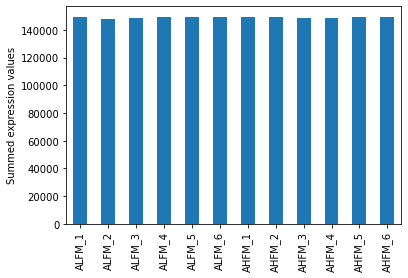

In [8]:
data.colsum()

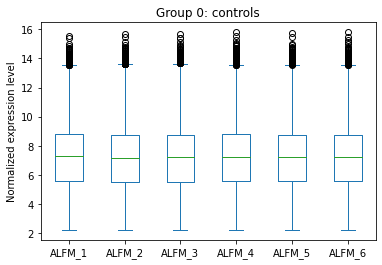

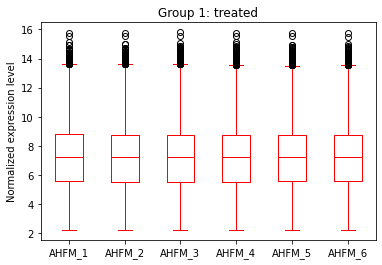

In [9]:
data.boxplot()

In [10]:
filt_data = data.logFC()

In [11]:
type(filt_data)

pandas.core.frame.DataFrame

In [12]:
filt_data_2 = data.logFC(threshold=2, output=1)

,Group 0: controls,Group 1: treated,Log Fold Change
GeneID,,,
1417462_at,9.883192,7.238491,-2.644701
1440455_at,6.488963,8.719694,2.230730
1431708_a_at,5.104721,7.524498,2.419777
1432198_at,9.717988,5.338488,-4.379500
1434171_at,5.904111,3.545376,-2.358736
1441573_at,4.641492,6.672037,2.030545
1444198_at,4.993992,7.061208,2.067217


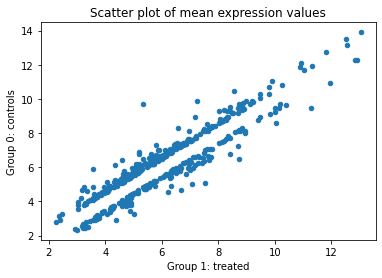

In [13]:
data.logFCplot()

In [14]:
!jupyter nbconvert --to html python_example_kristoffer_sandas.ipynb

[NbConvertApp] Converting notebook python_example_kristoffer_sandas.ipynb to html
[NbConvertApp] Writing 663847 bytes to python_example_kristoffer_sandas.html
